<a href="https://colab.research.google.com/github/rajan-dhinoja/machine_learning_projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.sparse
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv'))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [3]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("No Categorical Columns Found... \n")
else:
  print("-> Categorical Columns: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("No Numerical Columns Found... \n")
else:
  print("-> Numerical Columns: \n", numerical_cols)

No Categorical Columns Found... 

-> Numerical Columns: 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
print("> Shape of the Dataset: \n", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
print(dataset.describe().map(lambda x: round(x, 4)))

> Shape of the Dataset: 
 (768, 9) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None 

> Statistical summary of the Dataset:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         7

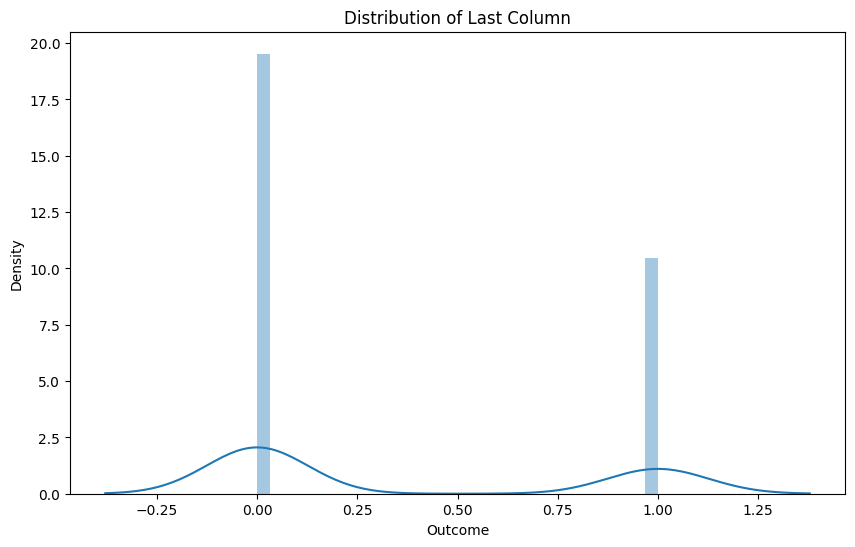

In [5]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

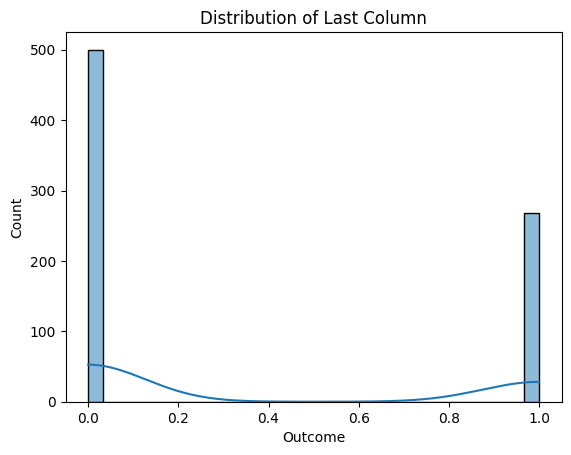

In [6]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

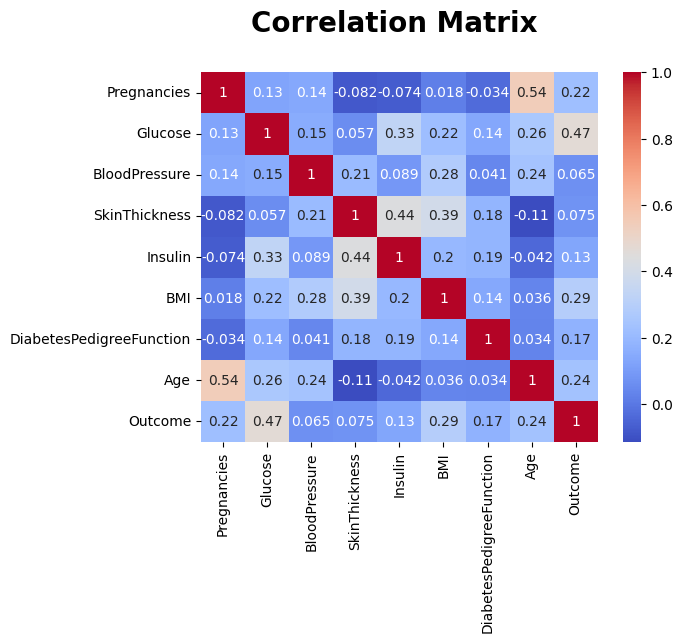

In [7]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [8]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("No Duplicate Data(or Identical Rows) found...")

No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [9]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

      print("\n")
      print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("No missing data found.")



No missing data found.


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [10]:
for col in dataset.columns:
  # Get value counts and convert to DataFrame with column name
  # .reset_index(name='Counts: '): This converts the Series into a DataFrame and names the count column as 'Counts: '.
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  # Transpose and print with formatting
  print(f"Column: \t'{col}'")
  # .to_string(header=False): This converts the transposed DataFrame to a string for printing and removes the header row.
  print(value_counts_dataset.T.to_string(header=False), "\n")


Column: 	'Pregnancies'
Unique Values:     1    0    2   3   4   5   6   7   8   9  10  11  13  12  14  15  17
Counts:          135  111  103  75  68  57  50  45  38  28  24  11  10   9   2   1   1 

Column: 	'Glucose'
Unique Values:   99  100  111  129  125  106  112  108  95  105  102  122  109  117  124  90  107  128  120  119  114  115  84  146  101  92  88  97  91  126  103  123  136  96  139  158  137  130  94  93  144  85  87  147  116  151  83  173  81  80  134  162  143  154  104  121  89  110  118  155  132  127  142  140  141  145  138  113  180  131  181  0  179  133  135  165  152  148  168  78  74  71  197  187  189  166  196  184  164  167  86  161  194  98  82  183  171  68  163  150  73  79  156  159  75  195  175  170  174  157  77  57  76  153  188  176  193  199  56  67  149  65  198  169  186  160  172  72  61  178  182  191  177  44  62  190
Counts:          17   17   14   14   14   14   13   13  13   13   13   12   12   11   11  11   11   11   11   11   11   10  1

### Step-3.4: Checking for Stopwords and Stemming them:-

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# if categorical_cols.any():
if categorical_cols.empty:
  print("No Categorical Columns Found... \n -> So, No Stemming Needed... ")
else:
  nltk.download('stopwords')

  stop_words = set(stopwords.words('english'))

  stemmer = PorterStemmer()

  def stemming(text):
      words = text.lower().split()
      stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
      return ' '.join(stemmed_words)  # Join stemmed words back into a string

  # Apply the stemming function to the specified columns
  for column in categorical_cols:
      dataset[column] = dataset[column].astype(str).apply(stemming)

  print("\n > Stemming Completed... \n")
  print(dataset.head().to_string(header=True))
# else:
  # print("No Stemming Needed...")

No Categorical Columns Found... 
 -> So, No Stemming Needed... 


### Step-3.5: Checking any Categorical Data and Encoding them:-

In [12]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

repeating_cols = []
for col in categorical_cols:
    # Matrix of Feature
    if col != dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'.")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        repeating_cols.append(col)
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t-'{col}' is Encoded Successfully...\n")

      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

    # Dependent Variable/Output
    if col == dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'(Output Column).")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
        le = LabelEncoder()
        y = le.fit_transform(dataset[col])
        print(f"\t-'{col}' is Encoded Successfully...\n")
      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
if repeating_cols:
  encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
  encoder_transform = encoder.fit_transform(X)

  # Conditional conversion to dense array
  if scipy.sparse.issparse(encoder_transform):  # Check if sparse
    X = encoder_transform.toarray()
  else:
    X = encoder_transform

else:
  print("No Repeating Columns found in Matrix of Features(X). \n")

print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
print("\n")
print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


=> Repeating Columns in Matrix of Features(X):  [] 

No Repeating Columns found in Matrix of Features(X). 

Matrix of Features(X): 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6      148             72             35        0 33.60                      0.63   50
1            1       85             66             29        0 26.60                      0.35   31
2            8      183             64              0        0 23.30                      0.67   32
3            1       89             66             23       94 28.10                      0.17   21
4            0      137             40             35      168 43.10                      2.29   33


Dependent Variable(y): 
 1
0
1
0
1


## Step-4: Split the Dataset into the Training set and Test set:-

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Printing Training Sets: ")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test, "\n")

print("\n")

print("Printing Test Sets: ")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

Printing Training Sets: 
> X_train: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1       90             62             12       43 27.20   
711            5      126             78             27       22 29.60   
373            2      105             58             40       94 34.90   
46             1      146             56              0        0 29.70   
682            0       95             64             39      105 44.60   
..           ...      ...            ...            ...      ...   ...   
451            2      134             70              0        0 28.90   
113            4       76             62              0        0 34.00   
556            1       97             70             40        0 38.10   
667           10      111             70             27        0 27.50   
107            4      144             58             28      140 29.50   

     DiabetesPedigreeFunction  Age  
353                      0.58   24  

## Step-5: Feature Scaling:-

In [14]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = scaler.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = scaler.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("Printing Training Sets after Feature Scaling:")
print("> X_train: \n", X_train)
print("\n")
print("Printing Test Sets after Feature Scaling:")
print("> X_test: \n", X_test)

Printing Training Sets after Feature Scaling:
> X_train: 
 [[-0.85 -0.98 -0.40 ... -0.61 0.31 -0.79]
 [0.36 0.16 0.47 ... -0.30 -0.12 0.56]
 [-0.55 -0.50 -0.62 ... 0.37 -0.76 -0.71]
 ...
 [-0.85 -0.76 0.03 ... 0.78 -0.79 -0.28]
 [1.87 -0.31 0.03 ... -0.57 -1.02 0.56]
 [0.05 0.73 -0.62 ... -0.31 -0.58 0.31]]


Printing Test Sets after Feature Scaling:
> X_test: 
 [[0.96 1.21 -0.30 ... -0.58 -0.56 0.56]
 [1.87 -1.68 1.99 ... 0.45 -0.58 1.15]
 [-0.55 0.03 0.36 ... 0.50 0.02 -0.62]
 ...
 [-0.55 -1.23 -0.95 ... -0.44 3.70 -0.71]
 [0.05 2.00 0.47 ... 0.64 -0.65 -0.20]
 [-0.85 -1.58 0.47 ... 0.16 -0.17 -1.05]]


# ***Step-B: Model Building & Evaluation:-***

## Step-1: Training the Model:-

In [15]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

#training the support vector Machine Classifier
model.fit(X_train, y_train)

SVC(kernel='linear')

## Step-2: Model Evaluation:-

### Step-2.1: Accuracy Score:-

In [16]:
from sklearn.metrics import accuracy_score

# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7915309446254072


In [17]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7207792207792207


### Step-2.2: Making a Predictive System:-

In [18]:
# input_data = (5,116,74,0,0,25.6,0.201,30)
input_data = np.array([5,116,74,0,0,25.6,0.201,30])

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1,-1)

# standardize the input data
std_data = scaler.fit_transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(f"Prediction: {prediction} \n")

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
Prediction: [0] 

The person is not diabetic


# Saving the Model

In [19]:
import pickle

filename = 'diabetes_prediction.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
#loading the saved model...
loaded_model = pickle.load(open('diabetes_prediction.sav', 'rb'))

In [21]:
# input_data = (5,116,74,0,0,25.6,0.201,30)
input_data = np.array([5,116,74,0,0,25.6,0.201,30])

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1,-1)

# standardize the input data
std_data = scaler.fit_transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(f"Prediction: {prediction} \n")

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
Prediction: [0] 

The person is not diabetic
